# EDA
## Start by importing libaries

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the clean DataFrames 

In [43]:
archivem6 = pd.read_csv(r'..\Data\Clean\carchive_M6.csv')
nrtmodis  = pd.read_csv(r'..\Data\Clean\cnrt_M6.csv')
archivev1 = pd.read_csv(r'..\Data\Clean\carchive_V1.csv')
nrtv1     = pd.read_csv(r'..\Data\Clean\cnrt_V1.csv')
rain      = pd.read_csv(r'..\Data\Clean\rain.csv')
wind      = pd.read_csv(r'..\Data\Clean\wind.csv')
weather   = pd.read_csv(r'..\Data\Clean\cweather.csv')

## Due to the date range of the data we will split the dataframes into days, weeks, months or years

In [44]:
# funcion to calculate the mean|max|min for each days|week|month|year for the specified columns
def timeselect(df, freq = 'D', fct = 'mean', columns = ['frp','brightness', 'bright_t31']):
    df['acq_date'] = pd.to_datetime(df['acq_date'])-pd.to_timedelta(7, unit='d')
    if fct == 'mean': out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].mean().reset_index().sort_values('acq_date')
    if fct == 'max':  out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].max().reset_index().sort_values('acq_date')
    if fct == 'min':  out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].min().reset_index().sort_values('acq_date')
    return out

In [45]:
# function to split the dataframes into a list of dataframes separated into days|weeks|months|years
def date_seperating(df, sel): 
    '''splits dataframes into weeks, months, years'''
    df['acq_date'] = pd.to_datetime(df['acq_date'])-pd.to_timedelta(7, unit='d')
    out = []
    if 'D' in sel:
        out.append([g.reset_index() for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'D'))])
    if 'W' in sel:
        out.append([g.reset_index() for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'W'))])
    if 'M' in sel:
        out.append([g.reset_index() for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'M'))])
    if 'Y' in sel:
        out.append([g.reset_index() for n, g in df.set_index('acq_date').groupby(pd.Grouper(freq = 'Y'))])
    return out[0]

In [20]:
m6cols = ['frp','brightness','bright_t31']
am6_y = timeselect(archivem6, freq='Y', columns=m6cols)
v1cols = ['frp','bright_ti4','bright_ti5']
av1_y = timeselect(archivev1, freq='Y', columns=v1cols)

In [31]:
am6_y_sel = am6_y[(am6_y.acq_date>=av1_y.acq_date.min()) & (am6_y.acq_date <= av1_y.acq_date.max())]

In [40]:
am6_y_sel.set_index('acq_date')['frp'].corrwith(av1_y.set_index('acq_date')['frp'])

AttributeError: 'Series' object has no attribute 'corrwith'

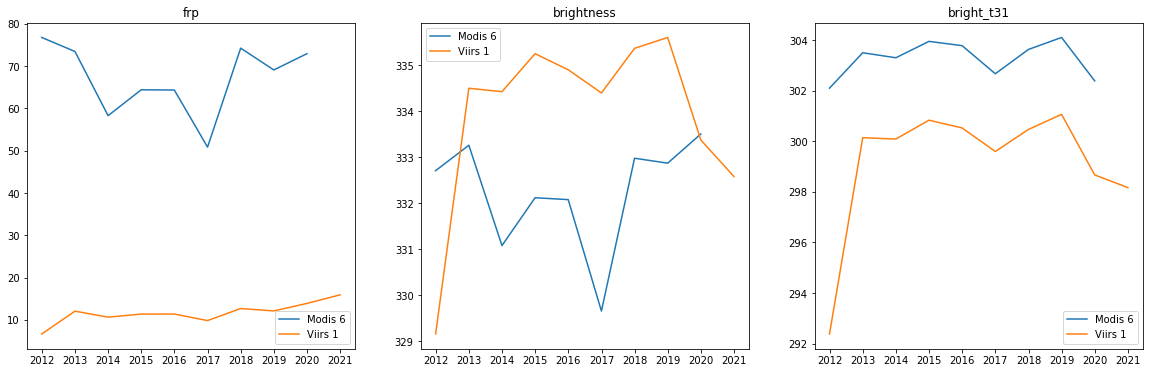

In [33]:
fig, ax = plt.subplots(1,3, figsize = (20,6))

for i in range(3):
    ax[i].plot(am6_y_sel.set_index('acq_date')[m6cols[i]], label='Modis 6')
    ax[i].plot(av1_y.set_index('acq_date')[v1cols[i]], label='Viirs 1')
    ax[i].legend()
    ax[i].set_title(m6cols[i])

In [46]:
weeks = date_seperating(weather, 'W')

In [30]:
weeks[42]

,acq_date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,latitude,longitude
0,2008-08-04,Sydney,5.6,15.8,0.0,3.4,7.6,NaN,NaN,W,...,1021.2,6.0,7.0,9.2,15.3,No,0.6,No,-33.854816,151.216454
1,2008-08-04,Canberra,-3.4,12.5,0.0,3.0,6.8,SSE,48.0,NNW,...,1021.8,6.0,7.0,1.4,11.2,No,0.0,No,-35.297591,149.101268
2,2008-08-04,Melbourne,6.7,14.3,0.4,1.4,7.1,SW,41.0,W,...,1025.9,6.0,6.0,8.9,13.5,No,0.0,No,-37.814218,144.963161
3,2008-08-04,Brisbane,8.5,16.9,0.0,3.8,0.0,WNW,19.0,SW,...,1022.8,8.0,8.0,12.1,16.8,No,0.0,No,-27.468968,153.023499
4,2008-08-04,Adelaide,5.5,14.9,0.0,4.6,5.7,WSW,30.0,NaN,...,1030.8,NaN,NaN,10.6,13.9,No,0.0,No,-34.928180,138.599931
5,2008-08-04,Perth,1.8,22.5,0.0,3.8,10.4,NNW,39.0,NNE,...,1025.8,0.0,3.0,13.2,22.1,No,0.0,No,-31.952712,115.860480
6,2008-08-04,Hobart,1.2,13.5,1.0,0.2,8.3,N,56.0,N,...,1018.2,2.0,4.0,6.4,12.0,No,0.0,No,-42.882509,147.328123
7,2008-08-04,Darwin,18.1,30.8,0.0,9.2,10.8,SE,46.0,SE,...,1014.7,2.0,1.0,21.1,29.5,No,0.0,No,-12.460440,130.841047
8,2008-08-05,Sydney,5.3,17.6,0.6,1.8,10.8,NaN,NaN,W,...,1025.4,1.0,5.0,9.5,17.5,No,0.0,No,-33.854816,151.216454
9,2008-08-05,Canberra,-5.3,13.1,0.0,2.2,7.9,NW,33.0,N,...,1025.6,6.0,6.0,0.1,12.2,No,0.0,No,-35.297591,149.101268


In [80]:
weeks[42].acq_date[0]

Timestamp('2008-08-04 00:00:00')

In [54]:
weeks_am6 = date_seperating(archivem6, 'W')

In [55]:
weeks_am6[406].acq_date[0]

Timestamp('2008-07-28 00:00:00')

In [48]:
bla2 = weeks[42].groupby('Location').mean()

In [103]:
bla2

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM,latitude,longitude
Location,,,,,,,,,,,,,,,,,,,
Adelaide,5.028571,14.700000,0.600000,2.160000,5.371429,35.714286,7.000000,15.142857,70.857143,51.000000,1029.542857,1027.471429,NaN,NaN,9.628571,13.842857,0.600000,-34.928180,138.599931
Brisbane,8.728571,21.171429,1.428571,3.457143,7.242857,27.142857,10.571429,10.285714,53.857143,44.571429,1024.742857,1021.600000,3.000000,4.000000,14.800000,19.657143,1.428571,-27.468968,153.023499
Canberra,-1.185714,13.128571,0.000000,3.028571,6.871429,43.000000,12.285714,22.571429,67.428571,35.714286,1025.557143,1022.842857,5.142857,4.857143,5.257143,12.114286,0.000000,-35.297591,149.101268
Darwin,19.257143,32.314286,0.000000,8.500000,10.028571,44.428571,19.571429,17.714286,37.857143,25.714286,1016.557143,1012.357143,2.857143,2.571429,23.185714,30.800000,0.000000,-12.460440,130.841047
Hobart,3.700000,13.942857,1.028571,1.857143,7.900000,50.142857,14.857143,17.714286,63.142857,46.000000,1019.742857,1017.614286,2.285714,4.428571,8.814286,12.257143,0.885714,-42.882509,147.328123
Melbourne,7.200000,13.700000,2.171429,1.885714,3.642857,39.428571,20.857143,20.714286,71.714286,55.714286,1025.957143,1024.500000,6.714286,6.857143,9.671429,13.014286,2.114286,-37.814218,144.963161
Perth,5.057143,19.642857,0.028571,3.457143,8.285714,34.714286,11.000000,13.857143,54.833333,39.285714,1029.657143,1026.300000,3.571429,3.571429,12.242857,18.714286,0.028571,-31.952712,115.860480
Sydney,7.357143,16.728571,3.428571,2.885714,6.171429,NaN,16.285714,16.571429,65.428571,47.285714,1024.471429,1022.057143,5.428571,6.142857,10.685714,15.814286,3.428571,-33.854816,151.216454


In [56]:
bla3 = weeks_am6[406].groupby('acq_date').mean()

In [114]:
bla3

,latitude,longitude,brightness,scan,track,confidence,bright_t31,frp
acq_date,,,,,,,,
2008-08-04,-17.152042,138.311757,320.805479,1.805822,1.276712,61.645548,295.021747,36.186986
2008-08-05,-15.488719,135.821143,323.342788,1.485457,1.170553,61.883413,298.680168,28.436058
2008-08-06,-16.315208,135.659078,327.020186,1.697205,1.236646,66.248447,300.364752,40.670031
2008-08-07,-17.134619,137.514230,325.401969,1.436568,1.158931,64.824191,296.757384,38.147257
2008-08-08,-15.926248,134.701380,330.432040,1.629268,1.210643,67.516630,302.393237,46.972727
2008-08-09,-16.955184,135.719144,320.916887,1.759894,1.256596,62.215040,297.598681,38.190106
2008-08-10,-14.124703,133.210086,328.944203,1.495718,1.184980,66.034256,301.538999,39.875099


In [64]:
import folium
import folium.plugins as plugins
from folium.plugins import HeatMap
f = folium.Figure(width=750, height=500)
center_lat = -24.003249 
center_long = 133.737310
m = folium.Map(location=[center_lat,center_long], control_scale=True, zoom_start=4,width=750, height=500,zoom_control=True).add_to(f)
for i in range(0,bla2.shape[0]):    
    location=[bla2.iloc[i]['latitude'], bla2.iloc[i]['longitude']]
    folium.CircleMarker(location,radius=bla2.WindSpeed3pm[i],color='red').add_to(m)
data_heat1 = bla3[['latitude','longitude','frp']].values.tolist()
#plugins.HeatMap(data_heat).add_to(m)
data_heat2 = bla3[['latitude','longitude','brightness']].values.tolist()
#plugins.HeatMap(data_heat,gradient={310: 'blue', 325: 'lime', 335: 'red'}).add_to(m)
HeatMap(data_heat1).add_to(folium.FeatureGroup(name='Heat Map1').add_to(m))
#HeatMap(data_heat2).add_to(folium.FeatureGroup(name='Heat Map2').add_to(m))
folium.TileLayer('stamenterrain').add_to(m)
folium.TileLayer('Stamen Toner').add_to(m)
add = '/MapServer/tile/{z}/{y}/{x}'
ESRI = dict(World_Ocean_Base='http://services.arcgisonline.com/arcgis/rest/services/Ocean/World_Ocean_Base',
            World_Navigation_Charts='http://services.arcgisonline.com/ArcGIS/rest/services/Specialty/World_Navigation_Charts',
            World_Ocean_Reference='http://services.arcgisonline.com/arcgis/rest/services/Ocean/World_Ocean_Reference',
            NatGeo_World_Map='http://services.arcgisonline.com/arcgis/rest/services/NatGeo_World_Map/MapServer',
            World_Imagery='http://services.arcgisonline.com/arcgis/rest/services/World_Imagery/MapServer',
            World_Physical_Map='http://services.arcgisonline.com/arcgis/rest/services/World_Physical_Map/MapServer',
            World_Shaded_Relief='http://services.arcgisonline.com/arcgis/rest/services/World_Shaded_Relief/MapServer',
            World_Street_Map='http://services.arcgisonline.com/arcgis/rest/services/World_Street_Map/MapServer',
            World_Terrain_Base='http://services.arcgisonline.com/arcgis/rest/services/World_Terrain_Base/MapServer',
            World_Topo_Map='http://services.arcgisonline.com/arcgis/rest/services/World_Topo_Map/MapServer')
            #vegetation_Map='http://services.ga.gov.au/gis/rest/services/NM_Cultivated_and_Native_Vegetation/MapServer')

for tile_name, tile_url in ESRI.items():
    tile_url += add
    folium.TileLayer(tile_url, attr=tile_url, name=tile_name).add_to(m)
    #m.add_tile_layer(tile_name=tile_name,
    #                 tile_url=tile_url)
#folium.TileLayer('https://opentopomap.org/#map={z}/{y}/{x}', attr = 'https://opentopomap.org/#map={z}/{y}/{x}', name = 'vegetation').add_to(m)
#m.add_layers_to_map()
folium.LayerControl().add_to(m)

display(m)

In [3]:
m6['acq_date'] = pd.to_datetime(m6['acq_date'])

In [6]:
archivem6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5081220 entries, 0 to 5081219
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   latitude    float64
 1   longitude   float64
 2   brightness  float64
 3   scan        float64
 4   track       float64
 5   acq_date    object 
 6   confidence  int64  
 7   bright_t31  float64
 8   frp         float64
dtypes: float64(7), int64(1), object(1)
memory usage: 348.9+ MB


In [23]:
rainy_days.head()

acq_date
2006-01-06    NaN
2006-01-07    NaN
2006-01-12    NaN
2006-01-15    NaN
2006-01-15    NaN
Name: acq_date, dtype: object

In [26]:
rainy_days = [m6.acq_date[m6.acq_date == i] for i in rain.acq_date.unique() if '2006-01' in i]

In [11]:
nrtmodis.head()

,latitude,longitude,brightness,scan,track,acq_date,confidence,bright_t31,frp
0,-16.357,137.685,336.9,1.5,1.2,2020-01-01,82,299.3,43.6
1,-16.360,137.699,329.5,1.5,1.2,2020-01-01,53,299.3,25.0
2,-16.359,137.678,327.2,1.5,1.2,2020-01-01,20,298.4,20.3
3,-16.361,137.692,335.8,1.5,1.2,2020-01-01,77,299.6,40.8
4,-16.364,137.706,329.5,1.5,1.2,2020-01-01,52,297.7,29.1


In [17]:
def timeselect(df, freq = 'D', fct = 'mean', columns = ['frp','brightness', 'bright_t31']):
    df['acq_date'] = pd.to_datetime(df['acq_date'])-pd.to_timedelta(7, unit='d')
    if fct == 'mean': out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].mean().reset_index().sort_values('acq_date')
    if fct == 'max':  out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].max().reset_index().sort_values('acq_date')
    if fct == 'min':  out = df.groupby([pd.Grouper(key='acq_date', freq=freq)])[columns].min().reset_index().sort_values('acq_date')
    return out

In [12]:
bla = timeselect(nrtmodis, 'M', fct = 'max', columns = 'confidence')

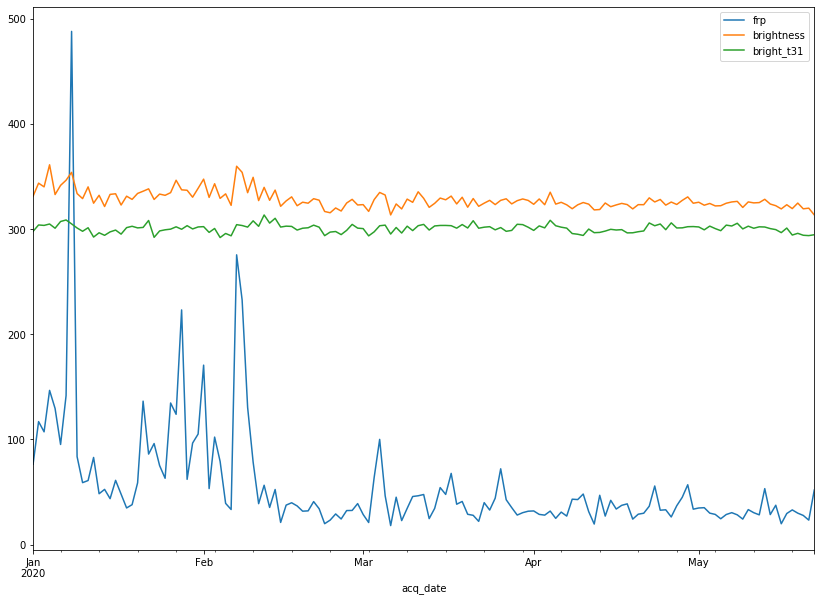

In [19]:
df.set_index('acq_date').plot(figsize = (14,10))

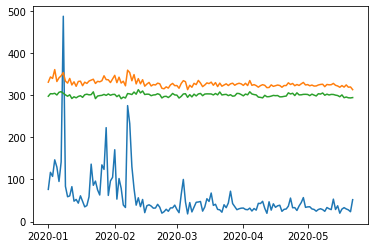

In [21]:
plt.plot(df.set_index('acq_date'))

In [ ]:
m6['acq_date'] = pd.to_datetime(m6['acq_date'])
dfm6 = m6.groupby([pd.Grouper(key='acq_date', freq='D')])[['frp','brightness', 'bright_t31']].mean().reset_index().sort_values('acq_date')

In [ ]:
dfm6.set_index('acq_date').plot(figsize = (14,10))

In [ ]:
plt.plot(dfm6.set_index('acq_date'))